In [1]:
import pandas as pd
import numpy as np 

In [2]:
dataset = np.loadtxt("Bank-Data-Dummies-Drop.csv", delimiter=",")
# split into input (X) and output (Y) variables\n
X = dataset[:,0:25]
Y = dataset[:,25]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib
import matplotlib.pyplot as plt


In [4]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = .25, random_state = 42)

In [5]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(7531, 25)
(2511, 25)
(7531,)
(2511,)


In [6]:
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier(n_estimators = 1000, random_state= 42)
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [7]:
forestScores = cross_val_score(rf, test_features, test_labels, cv = 10)
print(forestScores)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (forestScores.mean(), forestScores.std() * 2))

[0.80555556 0.75298805 0.78486056 0.75298805 0.80478088 0.812749
 0.80478088 0.76095618 0.74103586 0.74501992]
Random Forest Accuracy: 0.78 (+/- 0.05)


In [8]:
rfScore = rf.score(test_features, test_labels)
print(rfScore)

0.7865392273994425


In [9]:
predictionsForest = rf.predict(test_features)
print(predictionsForest)

[0. 1. 0. ... 1. 0. 1.]


In [10]:
cmForest = confusion_matrix(test_labels, predictionsForest)
print("confusion matrix")
print(cmForest)

confusion matrix
[[ 956  311]
 [ 225 1019]]


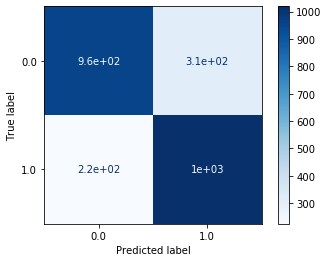

In [11]:
  disp = plot_confusion_matrix(rf, test_features, test_labels,
                                 cmap=plt.cm.Blues)

In [12]:
print(f" true negatives = {cmForest[0,0]}")
print(f" false negatives = {cmForest[1,0]}")
print(f" true positives = {cmForest[1,1]}")
print(f" false positives = {cmForest[0,1]}")

 true negatives = 956
 false negatives = 225
 true positives = 1019
 false positives = 311


In [13]:
forestPrecision = precision_score(test_labels, predictionsForest, average = None)
print(f"precison of no = {forestPrecision[0]}")
print(f"precison of yes = {forestPrecision[1]}")

precison of no = 0.8094834885690093
precison of yes = 0.7661654135338346


In [14]:
forestRecall = recall_score(test_labels, predictionsForest, average = None)
print(f"recall of no = {forestRecall[1]}")
print(f"recall of yes = {forestRecall[0]}")

recall of no = 0.8191318327974276
recall of yes = 0.7545382794001578


In [15]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter = 1000, random_state = 42)
logReg.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
regScores = cross_val_score(logReg, test_features, test_labels, cv = 10)
print(regScores)
print("Log Regression Accuracy: %0.2f (+/- %0.2f)" % (regScores.mean(), regScores.std() * 2))

[0.75396825 0.72111554 0.74103586 0.66533865 0.75697211 0.7689243
 0.74900398 0.64940239 0.71713147 0.70119522]
Log Regression Accuracy: 0.72 (+/- 0.08)


In [17]:
regScore = logReg.score(test_features, test_labels)
print(regScore)

0.7196336121067304


In [18]:
predictionsReg = logReg.predict(test_features)
print(predictionsReg)

[1. 1. 1. ... 0. 0. 1.]


In [19]:
cmReg = confusion_matrix(test_labels, predictionsReg)
print("confusion matrix")
print(cmReg)

confusion matrix
[[918 349]
 [355 889]]


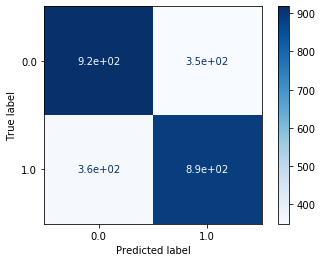

In [20]:
  disp = plot_confusion_matrix(logReg, test_features, test_labels,
                                 cmap=plt.cm.Blues)

In [21]:
print(f" true negatives = {cmReg[0,0]}")
print(f" false negatives = {cmReg[1,0]}")
print(f" true positives = {cmReg[1,1]}")
print(f" false positives = {cmReg[0,1]}")

 true negatives = 918
 false negatives = 355
 true positives = 889
 false positives = 349


In [22]:
regPrecision = precision_score(test_labels, predictionsReg, average = None)
print(f"precison of no = {regPrecision[0]}")
print(f"precison of yes = {regPrecision[1]}")

precison of no = 0.7211311861743912
precison of yes = 0.7180936995153473


In [23]:
regRecall = recall_score(test_labels, predictionsReg, average = None)
print(f"recall of no = {regRecall[1]}")
print(f"recall of yes = {regRecall[0]}")

recall of no = 0.7146302250803859
recall of yes = 0.7245461720599842


In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_features, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
nbScores = cross_val_score(nb, test_features, test_labels, cv = 10)
print(nbScores)
print("Niave Bayes Classifier: %0.2f (+/- %0.2f)" % (nbScores.mean(), nbScores.std() * 2))

[0.65873016 0.6812749  0.67330677 0.63346614 0.67330677 0.67330677
 0.70517928 0.64940239 0.66135458 0.64940239]
Niave Bayes Classifier: 0.67 (+/- 0.04)


In [26]:
nbScore = nb.score(test_features, test_labels)
print(nbScore)

0.6798088410991637


In [27]:
predictionsNb = nb.predict(test_features)
print(predictionsReg)

[1. 1. 1. ... 0. 0. 1.]


In [28]:
cmNb = confusion_matrix(test_labels, predictionsNb)
print("confusion matrix")
print(cmNb)

confusion matrix
[[958 309]
 [495 749]]


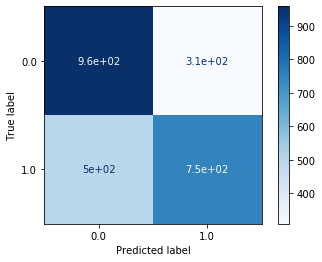

In [29]:
  disp = plot_confusion_matrix(nb, test_features, test_labels,
                                 cmap=plt.cm.Blues)

In [30]:
print(f" true negatives = {cmNb[0,0]}")
print(f" false negatives = {cmNb[1,0]}")
print(f" true positives = {cmNb[1,1]}")
print(f" false positives = {cmNb[0,1]}")

 true negatives = 958
 false negatives = 495
 true positives = 749
 false positives = 309


In [31]:
nbPrecision = precision_score(test_labels, predictionsNb, average = None)
print(f"precison of no = {nbPrecision[0]}")
print(f"precison of yes = {nbPrecision[1]}")

precison of no = 0.6593255333792154
precison of yes = 0.7079395085066162


In [32]:
nbRecall = recall_score(test_labels, predictionsNb, average = None)
print(f"recall of no = {nbRecall[1]}")
print(f"recall of yes = {nbRecall[0]}")

recall of no = 0.6020900321543409
recall of yes = 0.7561168113654302


<BarContainer object of 3 artists>

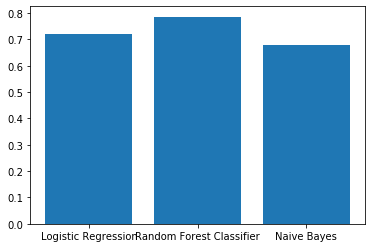

In [33]:
allScores = [regScore, rfScore, nbScore]
names = ['Logistic Regression', 'Random Forest Classifier', 'Naive Bayes']
plt.bar(names, allScores)